# Otto商品分类——Logistic 回归
## tfidf特征

In [1]:
import pandas as pd 
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dpath = './data/'
train = pd.read_csv(dpath + "Otto_FE_train_tfidf.csv")
train.head()

,id,feat_1_tfidf,feat_2_tfidf,feat_3_tfidf,feat_4_tfidf,feat_5_tfidf,feat_6_tfidf,feat_7_tfidf,feat_8_tfidf,feat_9_tfidf,...,feat_85_tfidf,feat_86_tfidf,feat_87_tfidf,feat_88_tfidf,feat_89_tfidf,feat_90_tfidf,feat_91_tfidf,feat_92_tfidf,feat_93_tfidf,target
0,1,0.081393,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.075886,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
1,2,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.231403,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
2,3,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.199730,0.0,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
3,4,0.011987,0.0,0.0,0.011668,0.105971,0.021681,0.080435,0.000000,0.0,...,0.000000,0.008244,0.022456,0.0,0.0,0.000000,0.0,0.0,0.0,Class_1
4,5,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.124622,0.000000,0.000000,0.0,0.0,0.145988,0.0,0.0,0.0,Class_1


In [3]:
y_train = train['target']   
X_train = train.drop(["id", "target"], axis=1)

# 保存特征名字以备后用（可视化）
feat_names = X_train.columns 

from scipy.sparse import csr_matrix

X_train = csr_matrix(X_train)

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

lr = LogisticRegression()

loss = cross_val_score(lr, X_train, y_train, cv=3, scoring='neg_log_loss')

print('logloss of each fold is: ', -loss)
print('mean cv logloss is:', -loss.mean())

E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logisti

logloss of each fold is:  [0.64867202 0.64985602 0.64124393]
mean cv logloss is: 0.6465906599107722


比log特征又好了一些

In [7]:
from sklearn.model_selection import GridSearchCV

penaltys = ['l1','l2']
Cs = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
tuned_parameters = dict(penalty = penaltys, C = Cs)

lr_penalty= LogisticRegression()
grid = GridSearchCV(lr_penalty, tuned_parameters, cv=3, scoring='neg_log_loss', n_jobs=4, return_train_score=True)
grid.fit(X_train, y_train)number_penaltys

E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
E:\Anaconda\envs\tensorflow-cpu\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=4,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_log_loss', verbose=0)

In [8]:
-grid.best_score_

0.6396367860794316

In [9]:
grid.best_params_

{'C': 100, 'penalty': 'l2'}

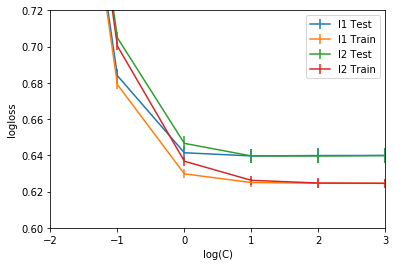

In [10]:
test_means = grid.cv_results_[ 'mean_test_score' ]
test_stds = grid.cv_results_[ 'std_test_score' ]
train_means = grid.cv_results_[ 'mean_train_score' ]
train_stds = grid.cv_results_[ 'std_train_score' ]

n_Cs = len(Cs)
number_penaltys = len(penaltys)
test_scores = np.array(test_means).reshape(n_Cs,number_penaltys)
train_scores = np.array(train_means).reshape(n_Cs,number_penaltys)
test_stds = np.array(test_stds).reshape(n_Cs,number_penaltys)
train_stds = np.array(train_stds).reshape(n_Cs,number_penaltys)

x_axis = np.log10(Cs)
for i in range(number_penaltys):
    plt.errorbar(x_axis, -test_scores[:, i], yerr=test_stds[:, i], label = penaltys[i] + ' Test')
    plt.errorbar(x_axis, -train_scores[:, i], yerr=train_stds[:, i], label = penaltys[i] + ' Train')
    
plt.legend()
plt.xlabel('log(C)')                                                                                                      
plt.ylabel('logloss')
plt.xlim(-2, 3)
plt.ylim(0.6, 0.72)

plt.show()

In [11]:
from sklearn.linear_model import LogisticRegressionCV

Cs = [1e-3, 1e-2, 1e-1, 1, 10, 100, 1000]
lr_cv = LogisticRegressionCV(Cs=Cs, cv=3, scoring='neg_log_loss', penalty='l1', solver='liblinear', multi_class='ovr')
lr_cv.fit(X_train, y_train) 

LogisticRegressionCV(Cs=[0.001, 0.01, 0.1, 1, 10, 100, 1000], class_weight=None,
                     cv=3, dual=False, fit_intercept=True,
                     intercept_scaling=1.0, l1_ratios=None, max_iter=100,
                     multi_class='ovr', n_jobs=None, penalty='l1',
                     random_state=None, refit=True, scoring='neg_log_loss',
                     solver='liblinear', tol=0.0001, verbose=0)

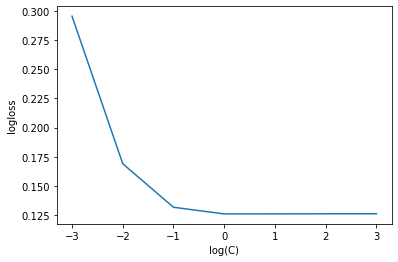

In [12]:
n_Cs = len(Cs)
n_classes = 9
scores =  np.zeros((n_classes, n_Cs))

for j in range(n_classes):
        scores[j][:] = np.mean(lr_cv.scores_['Class_'+ str(j+1)], axis = 0)
    
mse_mean = -np.mean(scores, axis = 0)
plt.plot(np.log10(Cs), mse_mean.reshape(n_Cs,1)) 
plt.xlabel('log(C)')
plt.ylabel('logloss')

plt.show()

In [13]:
mse_mean

array([0.29526266, 0.1690559 , 0.13182745, 0.12613988, 0.12618383,
       0.12625472, 0.12626648])

In [14]:
best_C = np.argmin(mse_mean)
best_score = np.min(mse_mean)
print(Cs[best_C], best_score)

1 0.12613987519414183


In [15]:
import pickle

pickle.dump(grid.best_estimator_, open("Otto_L2_tfidf_lr_and_grid.pkl", 'wb'))